In [ ]:
import tensorflow as tf

In [ ]:
(train_imgs,train_labels),(test_imgs,test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_imgs.shape)

(60000, 28, 28)


In [ ]:
print(train_imgs[0])
print(train_imgs[0].dtype)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, '0')

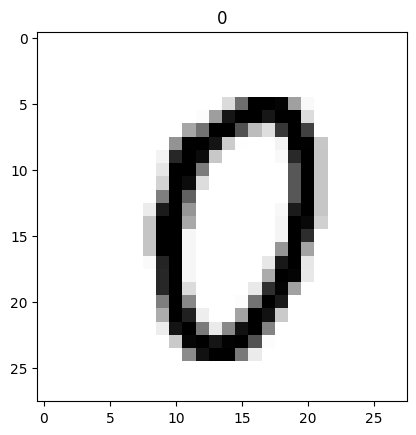

In [ ]:
plt.imshow(train_imgs[1000],cmap='gray_r')
plt.title(train_labels[1000])

In [9]:
print(train_imgs.shape)
print(train_labels.shape)
print(test_imgs.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


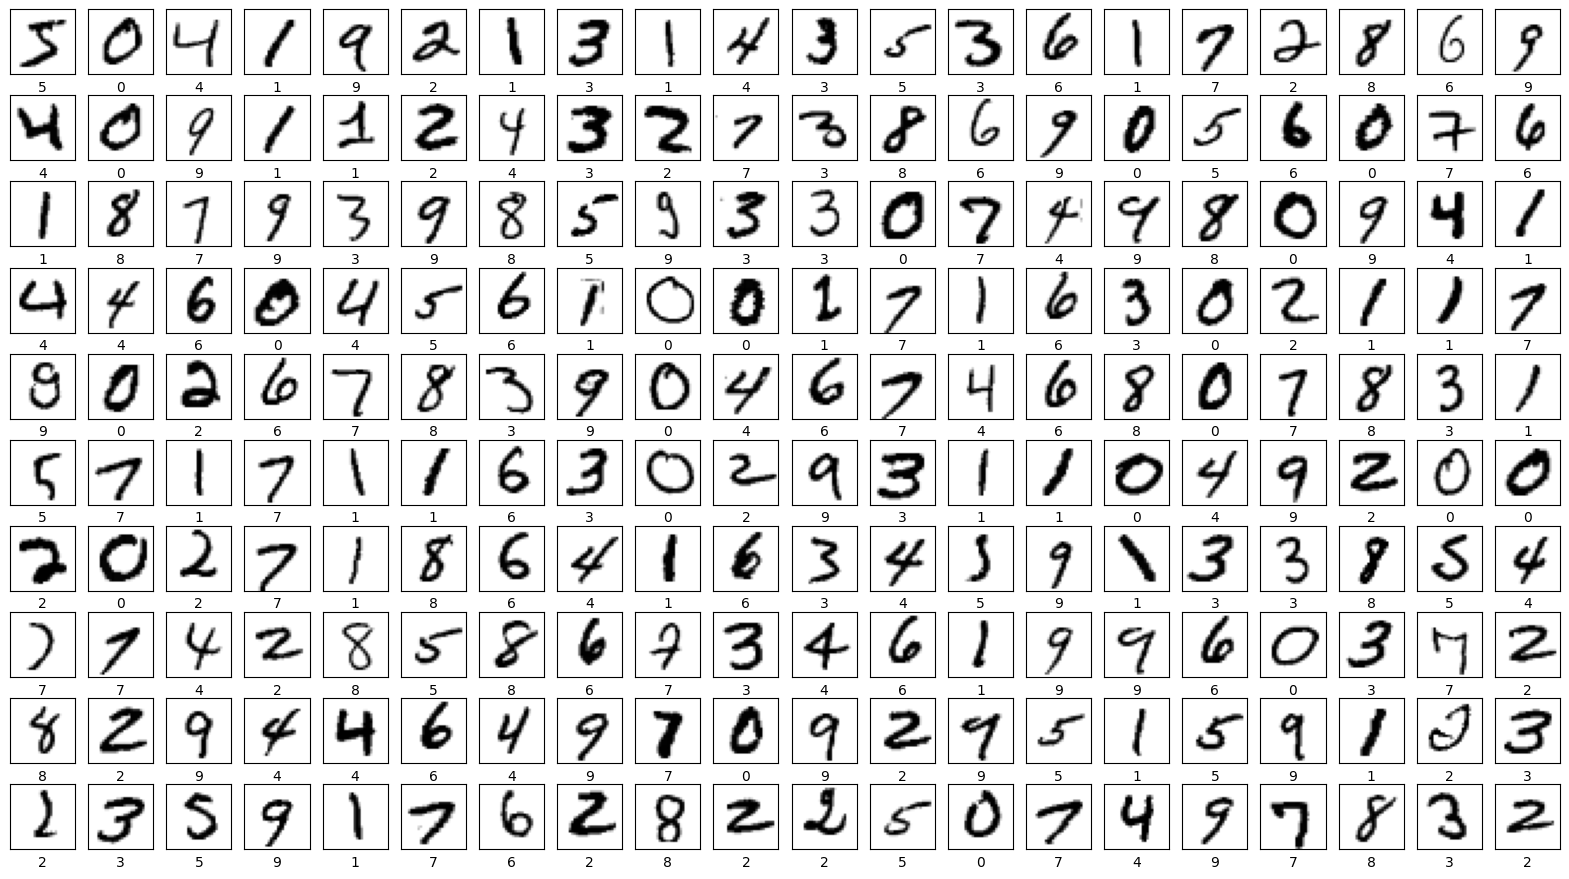

In [24]:
r = 10
c = 20
k = 0
plt.figure(figsize=(20,11))
for i in range(r):
  for j in range(c):
    plt.subplot(r,c,k+1)
    plt.imshow(train_imgs[k],cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(train_labels[k])
    k +=1
  plt.show

In [12]:
train_imgs_norm = train_imgs.reshape(-1,784).astype("float32")/255
test_imgs_norm = test_imgs.reshape(-1,784).astype("float32")/255

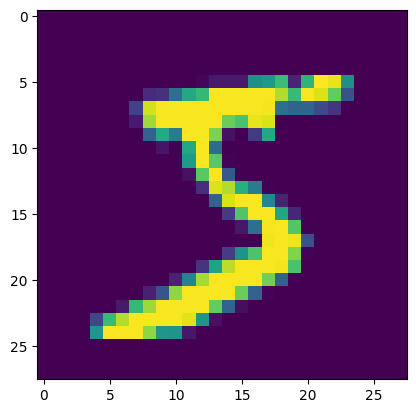

In [13]:
plt.imshow(train_imgs_norm[0].reshape(28,28))

In [15]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=784),
    tf.keras.layers.Dense(units=32,activation='relu'),
    tf.keras.layers.Dense(units=16,activation='relu'),
    tf.keras.layers.Dense(units=10,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 25818 (100.85 KB)
Trainable params: 25818 (100.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:

optimizers = ['adam', 'sgd', 'rmsprop']
history_dict = {}

for optimizer in optimizers:
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_imgs_norm, train_labels, epochs=10, validation_split=0.3)
    history_dict[optimizer] = history.history

Epoch 1/10
1313/1313 [==============================] - 8s 5ms/step - loss: 0.0245 - accuracy: 0.9926 - val_loss: 0.4085 - val_accuracy: 0.9581
Epoch 2/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0198 - accuracy: 0.9940 - val_loss: 0.4287 - val_accuracy: 0.9553
Epoch 3/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0239 - accuracy: 0.9926 - val_loss: 0.3996 - val_accuracy: 0.9573
Epoch 4/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0176 - accuracy: 0.9945 - val_loss: 0.4822 - val_accuracy: 0.9499
Epoch 5/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0189 - accuracy: 0.9941 - val_loss: 0.4085 - val_accuracy: 0.9581
Epoch 6/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0208 - accuracy: 0.9941 - val_loss: 0.4099 - val_accuracy: 0.9569
Epoch 7/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0158 - accuracy: 0.9951 - val_loss: 0.4356 - val_accuracy:

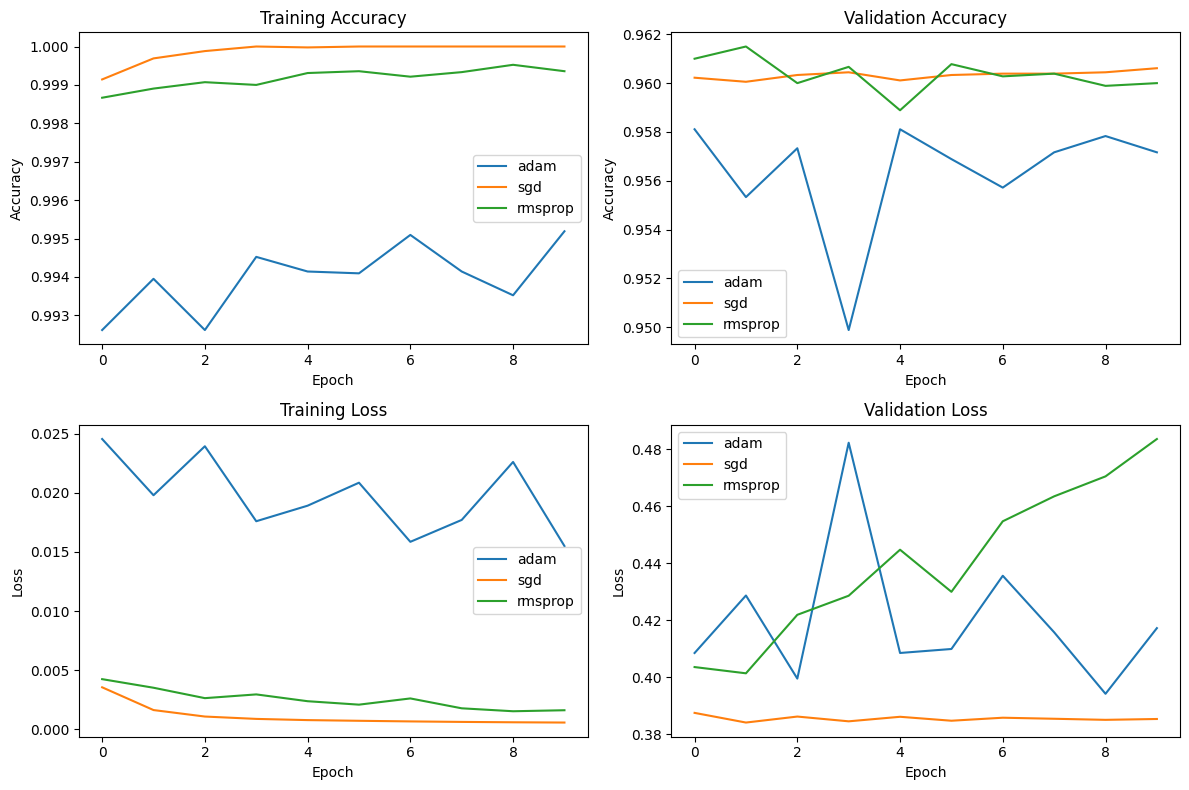

In [35]:
plt.figure(figsize=(12, 8))

# Plot training accuracy
plt.subplot(2, 2, 1)
for optimizer in optimizers:
    plt.plot(history_dict[optimizer]['accuracy'], label=optimizer)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot validation accuracy
plt.subplot(2, 2, 2)
for optimizer in optimizers:
    plt.plot(history_dict[optimizer]['val_accuracy'], label=optimizer)
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training loss
plt.subplot(2, 2, 3)
for optimizer in optimizers:
    plt.plot(history_dict[optimizer]['loss'], label=optimizer)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot validation loss
plt.subplot(2, 2, 4)
for optimizer in optimizers:
    plt.plot(history_dict[optimizer]['val_loss'], label=optimizer)
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()